In [127]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
import matplotlib.pyplot as plt
import re

In [128]:
# read the file
bc_1d_df = pd.read_table('AE33_AE33-C06-00589_20180115.dat', sep='\s+', skiprows=4, skip_blank_lines=True)

# rename the columns
col_names = bc_1d_df.columns
new_col_names = col_names.copy().values
bc_1d_df.columns = new_col_names

# re.sub(r'[\;\(].+', '', col_names[0])
for i in range(len(col_names)):
    new_col_names[i] = re.sub(r'\(.+', '', col_names[i])
for i in range(len(new_col_names)):
    new_col_names[i] = re.sub(r'\;', '', new_col_names[i])

In [129]:
# build the new DatetimeIndex
new_time_index = [0] * len(bc_1d_df.iloc[:, 0])

for i in range(len(bc_1d_df.iloc[:, 0])): 
    new_time_index[i] =  bc_1d_df.iloc[i, 0] + ' ' + bc_1d_df.iloc[i, 1]

new_time_index = pd.DatetimeIndex(new_time_index)

Text(0, 0.5, '$BC6, ng/m^{3}$')

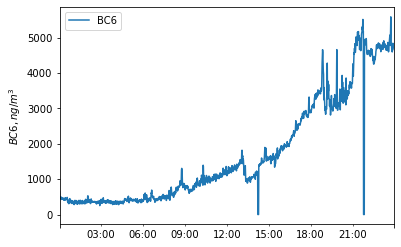

In [130]:
# get the new DataFrame
bc6_df = DataFrame(bc_1d_df.loc[1:, ['BC6']].values, index=new_time_index[1:], columns=['BC6'])
# plot the timeserie of BC6 per minute
bc6_df.plot()
plt.ylabel(r'$BC6, ng/m^{3}$')

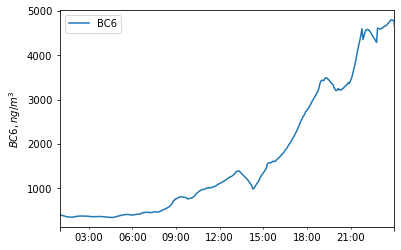

In [131]:
# calcualte the simple averages of BC6
window = 60 # 60 minutes

bc6_ma = bc6_df.iloc[(window-1):, :]

for i in range(window, len(bc6_df['BC6'])):
    bc6_ma.iloc[(i-window), 0] = np.mean(bc6_df.iloc[(i-window):i, 0])

bc6_ma.plot()
plt.ylabel(r'$BC6, ng/m^{3}$')
bc6_ma.index.name = 'Timestamp'
bc6_ma['BC6'] = bc6_ma['BC6'].astype(int)
bc6_ma.to_csv('bc6_ma.csv')